In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import matplotlib.pyplot as plt
import numpy as np


In [ ]:
with open("/content/drive/MyDrive/summaries/Summary_Bart.txt", "r") as f:
    bart_summary = f.read()

with open("/content/drive/MyDrive/summaries/Summary_t5.txt", "r") as f:
    t5_summary = f.read()

with open("/content/drive/MyDrive/summaries/Summary_pegasus.txt", "r") as f:
    pegasus_summary = f.read()

In [ ]:
import re

def extract_latencies(file_path):
    with open(file_path, "r") as f:
        lines = f.readlines()
        for line in lines:
            if "Latencies :" in line:
                # Use regex to extract list part only
                match = re.search(r"\[.*?\]", line)
                if match:
                    return eval(match.group())  # You can also use literal_eval for safety

# Load latencies from all three files
bart_latencies = extract_latencies("/content/drive/MyDrive/latencies/latency_Bart.txt")
t5_latencies = extract_latencies("/content/drive/MyDrive/latencies/latency_t5.txt")
pegasus_latencies = extract_latencies("/content/drive/MyDrive/latencies/latency_pegasus.txt")

# Print to verify
print("Bart:", bart_latencies)
print("T5:", t5_latencies)
print("Pegasus:", pegasus_latencies)


Bart: [23.279328107833862, 17.719146251678467, 18.098053693771362, 16.910552978515625, 12.985599756240845]
T5: [14.086961269378662, 12.60811710357666, 14.28424882888794, 16.256747484207153, 8.598206281661987]
Pegasus: [18.713342905044556, 18.968865156173706, 25.282150983810425, 28.336583614349365, 14.529189348220825]


In [ ]:
print("BART Summary:\n", bart_summary)
print("T5 Summary: \n", t5_summary)
print("PEGASUS Summary: \n",pegasus_summary)


BART Summary:
 Everybody's talking about artificial intelligence these days. Are they the same thing or are they different? And if so, what are those differences? And deep learning is another one that comes into play. We're going to take a look at that in this video and try to explain how all these technologies relate. Machine learning is, as its name implies, the machine is learning. I don't have to program it. I give it lots of information and it observes things. Machine learning really came along and became more popularized in this time frame. The next layer of our Venn diagram involves deep learning. With deep learning we use these things called neural networks. Neural networks are ways that in a computer we simulate and mimic the way the human brain works. Generative AI can generate new content out of existing information. This is where chat bots and all of these things come from. Other types of models are audio models, video models, and things like that. In the early days, AI's a

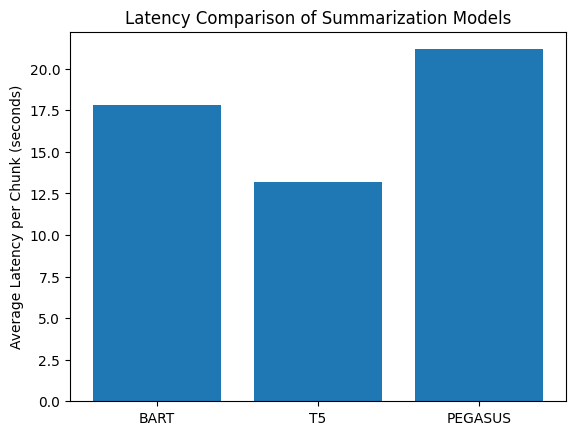

In [ ]:
models = ['BART', 'T5', 'PEGASUS']
avg_latencies = [
    sum(bart_latencies)/len(bart_latencies),
    sum(t5_latencies)/len(t5_latencies),
    sum(pegasus_latencies)/len(pegasus_latencies)
]

plt.bar(models, avg_latencies)
plt.ylabel("Average Latency per Chunk (seconds)")
plt.title("Latency Comparison of Summarization Models")
plt.show()
